In [31]:
import matplotlib

from experiments.evaluation_flow.shared import RESNET_50, MOBILENET, RESNET_18, RESNET_152
from experiments.plots.util import *

In [32]:
ROOT_LOG_DIR = '../evaluation_flow/evaluation-flow-results/results'
VERSION = 'version'
FINE_TUNED = 'fine-tuned'
OUTDOOR = 'outdoor'
FOOD = 'food'

In [33]:
# get all file sin the directory
all_files = all_files_in_dir(ROOT_LOG_DIR)
node_server_files = [f for f in all_files if 'server' in f or 'node' in f]
# for all files extract the metadata (e.g. what model and dataset is used)
U_IDS = 'u_ids'

files_and_meta = [(extract_file_meta(f), f) for f in node_server_files]
# add a mapping: use_case -> model id
files_and_meta = [({**f[0], **{U_IDS: use_case_ids(f[1])}}, f[1]) for f in files_and_meta]
# add the parsed events
files_and_meta = [({**f[0], **{EVENTS: parse_events(f[1])}}, f[1]) for f in files_and_meta]

In [34]:
valid_joined = join_server_and_node_meta(files_and_meta)

In [35]:
times = extract_times(valid_joined)

In [36]:
def to_s(values):
    return np.array(list(values)) * 10**-9

def plot_compare_times(baseline, param_update, provenance, save_path=None, ignore_use_cases=[], y_min_max=None):
    print('B: {}'.format(baseline))
    print('P_U: {}'.format(param_update))
    print('M_Prov: {}'.format(provenance))
    if ignore_use_cases:
        for u in ignore_use_cases:
            if u in baseline:
                del baseline[u]
            if u in param_update:
                del param_update[u]
            if u in provenance:
                del provenance[u]

    matplotlib.rcParams.update({'font.size': 16})
    fig = plt.figure()
    fig.set_size_inches(8, 6)
    x_labels = list(baseline.keys())
    ind = np.arange(len(x_labels))  # the x locations for the groups
    width = 0.3  # the width of the bars
    fig = plt.figure()
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, to_s(baseline.values()), width, color=HPI_LIGHT_ORANGE)
    rects2 = ax.bar(ind + width, to_s(param_update.values()), width, color=HPI_ORANGE)
    rects3 = ax.bar(ind + 2 * width, to_s(provenance.values()), width, color=HPI_RED)
    ax.set_ylabel('Time in seconds')
    ax.set_xticks(ind + width)
    ax.set_xticklabels(x_labels)
    ax.legend((rects1[0], rects2[0], rects3[0]), ('B', 'U_p', 'M_prov'),
              bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=3)
    ax.set_xlabel('Use case')

    plt.xticks(rotation=45, ha='right')

    if y_min_max:
        axes = plt.gca()
        axes.set_ylim(y_min_max)

    if save_path:
        fig.savefig(save_path, bbox_inches='tight')
        fig.savefig(save_path + '.pdf', bbox_inches='tight')

    plt.show()

B: {'U_1': 118408092.0, 'U_2': 110519238.0, 'U_3_1_1': 116922156.0, 'U_3_1_2': 104871928.0, 'U_3_1_3': 110656217.0, 'U_3_1_4': 108543879.0, 'U_3_2_1': 113886749.0, 'U_3_2_2': 108073548.0, 'U_3_2_3': 110281575.0, 'U_3_2_4': 108391559.0}
P_U: {'U_1': 124732258.5, 'U_2': 113656050.0, 'U_3_1_1': 135245867.0, 'U_3_1_2': 93971896.5, 'U_3_1_3': 99474641.5, 'U_3_1_4': 96403789.0, 'U_3_2_1': 108170054.5, 'U_3_2_2': 109227954.5, 'U_3_2_3': 100610623.0, 'U_3_2_4': 98900517.5}
M_Prov: {'U_1': 104217108.0, 'U_2': 919835067.0, 'U_3_1_1': 461571157.5, 'U_3_1_2': 445156053.5, 'U_3_1_3': 410317856.0, 'U_3_1_4': 438460266.5, 'U_3_2_1': 480562904.0, 'U_3_2_2': 418619337.0, 'U_3_2_3': 407410879.5, 'U_3_2_4': 414682744.0}


<Figure size 576x432 with 0 Axes>

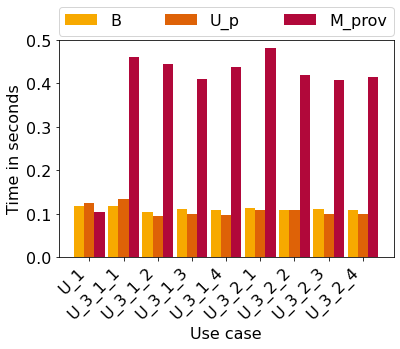

In [37]:
metas = filter_meta(times, model=MOBILENET, approach=BASELINE, snapshot_type=VERSION, snapshot_dist='outdoor')
baseline_save_times = aggregate_fields(metas, aggregate='median', field_key=HIGH_LEVEL_SAVE_TIMES)[HIGH_LEVEL_SAVE_TIMES]

metas = filter_meta(times, model=MOBILENET, approach=PARAM_UPDATE_IMPROVED, snapshot_type=VERSION, snapshot_dist='outdoor')
improved_save_param_update_times = aggregate_fields(metas, aggregate='median', field_key=HIGH_LEVEL_SAVE_TIMES)[HIGH_LEVEL_SAVE_TIMES]

metas = filter_meta(times, model=MOBILENET, approach='provenance', snapshot_type=VERSION, snapshot_dist='outdoor')
prov_save_times = aggregate_fields(metas, aggregate='median', field_key=HIGH_LEVEL_SAVE_TIMES)[HIGH_LEVEL_SAVE_TIMES]

plot_compare_times(baseline_save_times, improved_save_param_update_times, prov_save_times, ignore_use_cases=[U_2],
                          save_path='saved-plots/comparisons/compare-save-time-mobilenet-version', y_min_max=[0,0.5])

B: {'U_1': 838217051.0, 'U_2': 807457609.0, 'U_3_1_1': 847395097.0, 'U_3_1_2': 874969211.0, 'U_3_1_3': 832710725.0, 'U_3_1_4': 844724321.0, 'U_3_2_1': 834353152.0, 'U_3_2_2': 843024151.0, 'U_3_2_3': 830595977.0, 'U_3_2_4': 828704357.0}
P_U: {'U_1': 832405284.0, 'U_2': 827446004.0, 'U_3_1_1': 861662323.0, 'U_3_1_2': 850562166.0, 'U_3_1_3': 817843116.0, 'U_3_1_4': 845018932.0, 'U_3_2_1': 833314556.0, 'U_3_2_2': 836814949.0, 'U_3_2_3': 879498732.0, 'U_3_2_4': 830266497.0}
M_Prov: {'U_1': 826937621.0, 'U_2': 1176915001.0, 'U_3_1_1': 778677913.0, 'U_3_1_2': 782442209.0, 'U_3_1_3': 713305750.0, 'U_3_1_4': 711464239.0, 'U_3_2_1': 802828111.0, 'U_3_2_2': 758050032.0, 'U_3_2_3': 750888528.0, 'U_3_2_4': 757812045.0}


<Figure size 576x432 with 0 Axes>

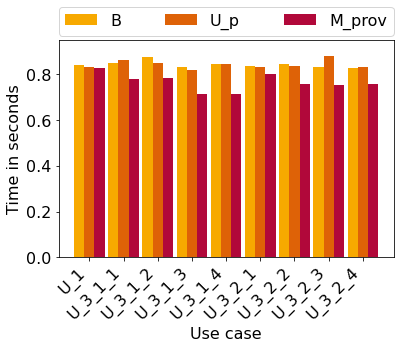

In [38]:
metas = filter_meta(times, model=RESNET_152, approach=BASELINE, snapshot_type=VERSION, snapshot_dist='outdoor')
baseline_save_times = aggregate_fields(metas, aggregate='median', field_key=HIGH_LEVEL_SAVE_TIMES)[HIGH_LEVEL_SAVE_TIMES]

metas = filter_meta(times, model=RESNET_152, approach=PARAM_UPDATE_IMPROVED, snapshot_type=VERSION, snapshot_dist='outdoor')
improved_save_param_update_times = aggregate_fields(metas, aggregate='median', field_key=HIGH_LEVEL_SAVE_TIMES)[HIGH_LEVEL_SAVE_TIMES]

metas = filter_meta(times, model=RESNET_152, approach='provenance', snapshot_type=VERSION, snapshot_dist='outdoor')
prov_save_times = aggregate_fields(metas, aggregate='median', field_key=HIGH_LEVEL_SAVE_TIMES)[HIGH_LEVEL_SAVE_TIMES]

plot_compare_times(baseline_save_times, improved_save_param_update_times, prov_save_times, ignore_use_cases=[U_2],
                          save_path='saved-plots/comparisons/compare-save-time-resnet152-version', y_min_max=[0,0.95])

B: {'U_1': 119873244.0, 'U_2': 113957209.0, 'U_3_1_1': 118195311.0, 'U_3_1_2': 104360817.0, 'U_3_1_3': 110255600.0, 'U_3_1_4': 106660864.0, 'U_3_2_1': 116193553.0, 'U_3_2_2': 106565149.0, 'U_3_2_3': 109882640.0, 'U_3_2_4': 110362881.0}
P_U: {'U_1': 122043773.0, 'U_2': 87803136.0, 'U_3_1_1': 84539531.0, 'U_3_1_2': 74773671.0, 'U_3_1_3': 74261704.0, 'U_3_1_4': 79418362.0, 'U_3_2_1': 85103582.0, 'U_3_2_2': 86992665.0, 'U_3_2_3': 77751178.0, 'U_3_2_4': 75860185.0}
M_Prov: {'U_1': 99961057.0, 'U_2': 895047759.0, 'U_3_1_1': 447450732.0, 'U_3_1_2': 421870473.0, 'U_3_1_3': 400919805.0, 'U_3_1_4': 402563287.0, 'U_3_2_1': 426102413.0, 'U_3_2_2': 380382462.0, 'U_3_2_3': 398286716.0, 'U_3_2_4': 382823016.0}


<Figure size 576x432 with 0 Axes>

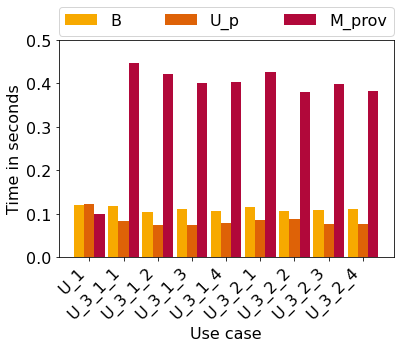

In [39]:
metas = filter_meta(times, model=MOBILENET, approach=BASELINE, snapshot_type=FINE_TUNED, snapshot_dist='outdoor')
baseline_save_times = aggregate_fields(metas, aggregate='median', field_key=HIGH_LEVEL_SAVE_TIMES)[HIGH_LEVEL_SAVE_TIMES]

metas = filter_meta(times, model=MOBILENET, approach=PARAM_UPDATE_IMPROVED, snapshot_type=FINE_TUNED, snapshot_dist='outdoor')
improved_save_param_update_times = aggregate_fields(metas, aggregate='median', field_key=HIGH_LEVEL_SAVE_TIMES)[HIGH_LEVEL_SAVE_TIMES]

metas = filter_meta(times, model=MOBILENET, approach='provenance', snapshot_type=FINE_TUNED, snapshot_dist='outdoor')
prov_save_times = aggregate_fields(metas, aggregate='median', field_key=HIGH_LEVEL_SAVE_TIMES)[HIGH_LEVEL_SAVE_TIMES]

plot_compare_times(baseline_save_times, improved_save_param_update_times, prov_save_times, ignore_use_cases=[U_2],
                          save_path='saved-plots/comparisons/compare-save-time-mobilenet-finetuned', y_min_max=[0,0.5])

B: {'U_1': 820768494.0, 'U_2': 816250279.0, 'U_3_1_1': 835977965.0, 'U_3_1_2': 826629940.0, 'U_3_1_3': 837849114.0, 'U_3_1_4': 835601793.0, 'U_3_2_1': 837919386.0, 'U_3_2_2': 827869343.0, 'U_3_2_3': 830677618.0, 'U_3_2_4': 836071753.0}
P_U: {'U_1': 838159138.0, 'U_2': 413228441.0, 'U_3_1_1': 465265647.0, 'U_3_1_2': 409772745.0, 'U_3_1_3': 404350234.0, 'U_3_1_4': 406303574.0, 'U_3_2_1': 419301374.0, 'U_3_2_2': 428612370.0, 'U_3_2_3': 408745215.0, 'U_3_2_4': 408187663.0}
M_Prov: {'U_1': 826995821.0, 'U_2': 1157171702.0, 'U_3_1_1': 767150804.0, 'U_3_1_2': 732034102.0, 'U_3_1_3': 732344098.0, 'U_3_1_4': 742909843.0, 'U_3_2_1': 734322483.0, 'U_3_2_2': 710835975.0, 'U_3_2_3': 713568445.0, 'U_3_2_4': 767811085.0}


<Figure size 576x432 with 0 Axes>

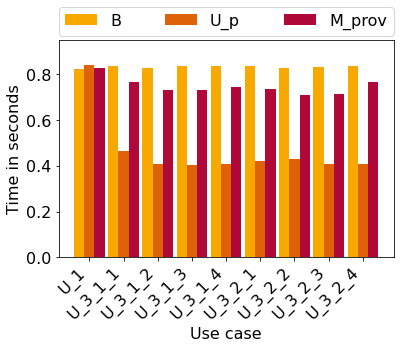

In [40]:
metas = filter_meta(times, model=RESNET_152, approach=BASELINE, snapshot_type=FINE_TUNED, snapshot_dist='outdoor')
baseline_save_times = aggregate_fields(metas, aggregate='median', field_key=HIGH_LEVEL_SAVE_TIMES)[HIGH_LEVEL_SAVE_TIMES]

metas = filter_meta(times, model=RESNET_152, approach=PARAM_UPDATE_IMPROVED, snapshot_type=FINE_TUNED, snapshot_dist='outdoor')
improved_save_param_update_times = aggregate_fields(metas, aggregate='median', field_key=HIGH_LEVEL_SAVE_TIMES)[HIGH_LEVEL_SAVE_TIMES]

metas = filter_meta(times, model=RESNET_152, approach='provenance', snapshot_type=FINE_TUNED, snapshot_dist='outdoor')
prov_save_times = aggregate_fields(metas, aggregate='median', field_key=HIGH_LEVEL_SAVE_TIMES)[HIGH_LEVEL_SAVE_TIMES]

plot_compare_times(baseline_save_times, improved_save_param_update_times, prov_save_times, ignore_use_cases=[U_2],
                          save_path='saved-plots/comparisons/compare-save-time-resnet152-finetuned', y_min_max=[0,0.95])


In [41]:
# Recover times



B: {'U_1': 1363224193.0, 'U_3_1_1': 1384156582.0, 'U_3_1_2': 1385568057.0, 'U_3_1_3': 1382484890.0, 'U_3_1_4': 1379703455.0, 'U_2': 1336196812.0, 'U_3_2_1': 1447325275.0, 'U_3_2_2': 1377557207.0, 'U_3_2_3': 1378810340.0, 'U_3_2_4': 1391824394.0}
P_U: {'U_1': 1368735733.5, 'U_3_1_1': 1448628120.0, 'U_3_1_2': 1523405968.5, 'U_3_1_3': 1635180609.0, 'U_3_1_4': 1649274542.0, 'U_2': 1440303881.0, 'U_3_2_1': 1523686522.5, 'U_3_2_2': 1596949587.5, 'U_3_2_3': 1670455986.0, 'U_3_2_4': 1734682581.0}
M_Prov: {'U_1': 154643582.5, 'U_3_1_1': 1563083787.0, 'U_3_1_2': 3337411778.5, 'U_3_1_3': 4696265805.0, 'U_3_1_4': 5912442704.5, 'U_2': 3140416798.0, 'U_3_2_1': 4096241205.5, 'U_3_2_2': 5467490260.5, 'U_3_2_3': 6845573245.5, 'U_3_2_4': 7999820236.0}


<Figure size 576x432 with 0 Axes>

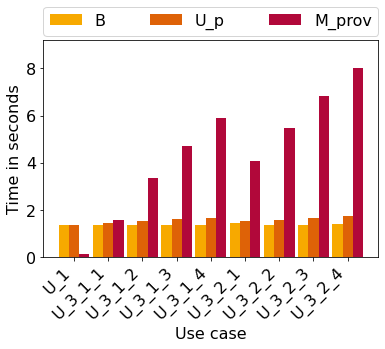

In [42]:

metas = filter_meta(times, model=MOBILENET, approach=BASELINE, snapshot_type=VERSION, snapshot_dist='outdoor')
baseline_recover_times = aggregate_fields(metas, aggregate='median', field_key=HIGH_LEVEL_RECOVER_TIMES)[HIGH_LEVEL_RECOVER_TIMES]

metas = filter_meta(times, model=MOBILENET, approach=PARAM_UPDATE_IMPROVED, snapshot_type=VERSION, snapshot_dist='outdoor')
improved_recover_param_update_times = aggregate_fields(metas, aggregate='median', field_key=HIGH_LEVEL_RECOVER_TIMES)[HIGH_LEVEL_RECOVER_TIMES]

metas = filter_meta(times, model=MOBILENET, approach='provenance', snapshot_type=VERSION, snapshot_dist='outdoor')
prov_recover_times = aggregate_fields(metas, aggregate='median', field_key=HIGH_LEVEL_RECOVER_TIMES)[HIGH_LEVEL_RECOVER_TIMES]

plot_compare_times(baseline_recover_times, improved_recover_param_update_times, prov_recover_times, ignore_use_cases=[U_2],
                          save_path='saved-plots/comparisons/compare-recover-time-mobilenet-version', y_min_max=[0,9.2])

B: {'U_1': 3278702225.0, 'U_3_1_1': 3233513816.0, 'U_3_1_2': 3286800806.0, 'U_3_1_3': 3248870854.0, 'U_3_1_4': 3219803226.0, 'U_2': 3205750069.0, 'U_3_2_1': 3202618389.0, 'U_3_2_2': 3194262637.0, 'U_3_2_3': 3221228475.0, 'U_3_2_4': 3199429292.0}
P_U: {'U_1': 3288836192.0, 'U_3_1_1': 3972457739.0, 'U_3_1_2': 4673787073.0, 'U_3_1_3': 5381541779.0, 'U_3_1_4': 6136788166.0, 'U_2': 3951012213.0, 'U_3_2_1': 4723824497.0, 'U_3_2_2': 5495961709.0, 'U_3_2_3': 6400399512.0, 'U_3_2_4': 7153053266.0}
M_Prov: {'U_1': 1573765669.0, 'U_3_1_1': 4037135289.0, 'U_3_1_2': 8075394581.0, 'U_3_1_3': 9930539126.0, 'U_3_1_4': 12411363279.0, 'U_2': 5634229248.0, 'U_3_2_1': 7762845676.0, 'U_3_2_2': 10074363255.0, 'U_3_2_3': 12713428444.0, 'U_3_2_4': 15915442934.0}


<Figure size 576x432 with 0 Axes>

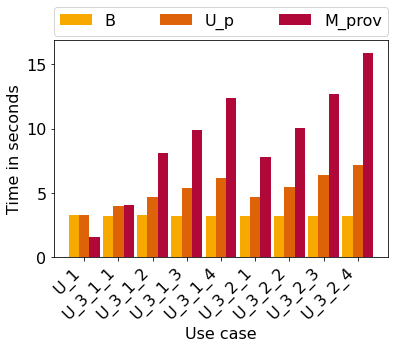

In [43]:
metas = filter_meta(times, model=RESNET_152, approach=BASELINE, snapshot_type=VERSION, snapshot_dist='outdoor')
baseline_recover_times = aggregate_fields(metas, aggregate='median', field_key=HIGH_LEVEL_RECOVER_TIMES)[HIGH_LEVEL_RECOVER_TIMES]

metas = filter_meta(times, model=RESNET_152, approach=PARAM_UPDATE_IMPROVED, snapshot_type=VERSION, snapshot_dist='outdoor')
improved_recover_param_update_times = aggregate_fields(metas, aggregate='median', field_key=HIGH_LEVEL_RECOVER_TIMES)[HIGH_LEVEL_RECOVER_TIMES]

metas = filter_meta(times, model=RESNET_152, approach='provenance', snapshot_type=VERSION, snapshot_dist='outdoor')
prov_recover_times = aggregate_fields(metas, aggregate='median', field_key=HIGH_LEVEL_RECOVER_TIMES)[HIGH_LEVEL_RECOVER_TIMES]

plot_compare_times(baseline_recover_times, improved_recover_param_update_times, prov_recover_times, ignore_use_cases=[U_2],
                          save_path='saved-plots/comparisons/compare-recover-time-resnet152-version', y_min_max=[0,16.9])


B: {'U_1': 1358735615.0, 'U_3_1_1': 1385795376.0, 'U_3_1_2': 1392361027.0, 'U_3_1_3': 1377061689.0, 'U_3_1_4': 1385105726.0, 'U_2': 1344306312.0, 'U_3_2_1': 1452961721.0, 'U_3_2_2': 1370720898.0, 'U_3_2_3': 1378161217.0, 'U_3_2_4': 1384631316.0}
P_U: {'U_1': 1372370887.0, 'U_3_1_1': 1415921935.0, 'U_3_1_2': 1483482041.0, 'U_3_1_3': 1573060260.0, 'U_3_1_4': 1583791996.0, 'U_2': 1411520991.0, 'U_3_2_1': 1492550099.0, 'U_3_2_2': 1528669935.0, 'U_3_2_3': 1604073733.0, 'U_3_2_4': 1658133462.0}
M_Prov: {'U_1': 155633744.0, 'U_3_1_1': 1734125731.0, 'U_3_1_2': 3445961194.0, 'U_3_1_3': 4601735629.0, 'U_3_1_4': 5644425395.0, 'U_2': 2785866224.0, 'U_3_2_1': 4680856600.0, 'U_3_2_2': 5652350341.0, 'U_3_2_3': 7078631355.0, 'U_3_2_4': 8736978918.0}


<Figure size 576x432 with 0 Axes>

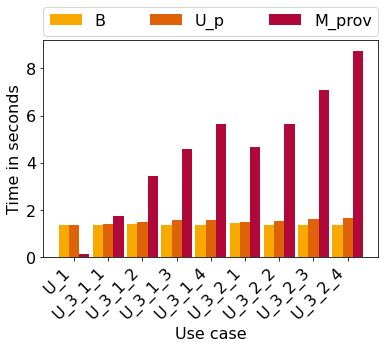

In [44]:

metas = filter_meta(times, model=MOBILENET, approach=BASELINE, snapshot_type=FINE_TUNED, snapshot_dist='outdoor')
baseline_recover_times = aggregate_fields(metas, aggregate='median', field_key=HIGH_LEVEL_RECOVER_TIMES)[HIGH_LEVEL_RECOVER_TIMES]

metas = filter_meta(times, model=MOBILENET, approach=PARAM_UPDATE_IMPROVED, snapshot_type=FINE_TUNED, snapshot_dist='outdoor')
improved_recover_param_update_times = aggregate_fields(metas, aggregate='median', field_key=HIGH_LEVEL_RECOVER_TIMES)[HIGH_LEVEL_RECOVER_TIMES]

metas = filter_meta(times, model=MOBILENET, approach='provenance', snapshot_type=FINE_TUNED, snapshot_dist='outdoor')
prov_recover_times = aggregate_fields(metas, aggregate='median', field_key=HIGH_LEVEL_RECOVER_TIMES)[HIGH_LEVEL_RECOVER_TIMES]

plot_compare_times(baseline_recover_times, improved_recover_param_update_times, prov_recover_times, ignore_use_cases=[U_2],
                          save_path='saved-plots/comparisons/compare-recover-time-mobilenet-finetuned', y_min_max=[0,9.2])

B: {'U_1': 3310473323.0, 'U_3_1_1': 3257740966.0, 'U_3_1_2': 3359813340.0, 'U_3_1_3': 3296864983.0, 'U_3_1_4': 3275220590.0, 'U_2': 3234685172.0, 'U_3_2_1': 3283436186.0, 'U_3_2_2': 3255334340.0, 'U_3_2_3': 3223195601.0, 'U_3_2_4': 3243059596.0}
P_U: {'U_1': 3287444166.0, 'U_3_1_1': 3500566609.0, 'U_3_1_2': 4011459580.0, 'U_3_1_3': 4460618531.0, 'U_3_1_4': 4870838813.0, 'U_2': 3485849609.0, 'U_3_2_1': 3948553613.0, 'U_3_2_2': 4404036352.0, 'U_3_2_3': 4906404090.0, 'U_3_2_4': 5371224726.0}
M_Prov: {'U_1': 1567582112.0, 'U_3_1_1': 4309432241.0, 'U_3_1_2': 7958792449.0, 'U_3_1_3': 10070761551.0, 'U_3_1_4': 11888635897.0, 'U_2': 5050164841.0, 'U_3_2_1': 8439102016.0, 'U_3_2_2': 10974597579.0, 'U_3_2_3': 12662457537.0, 'U_3_2_4': 15606493477.0}


<Figure size 576x432 with 0 Axes>

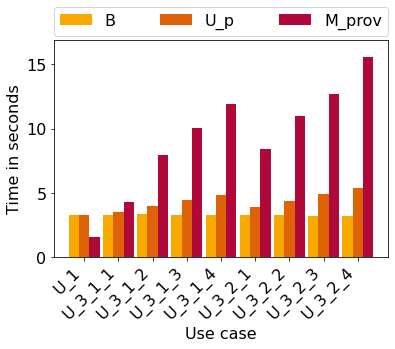

In [45]:
metas = filter_meta(times, model=RESNET_152, approach=BASELINE, snapshot_type=FINE_TUNED, snapshot_dist='outdoor')
baseline_recover_times = aggregate_fields(metas, aggregate='median', field_key=HIGH_LEVEL_RECOVER_TIMES)[HIGH_LEVEL_RECOVER_TIMES]

metas = filter_meta(times, model=RESNET_152, approach=PARAM_UPDATE_IMPROVED, snapshot_type=FINE_TUNED, snapshot_dist='outdoor')
improved_recover_param_update_times = aggregate_fields(metas, aggregate='median', field_key=HIGH_LEVEL_RECOVER_TIMES)[HIGH_LEVEL_RECOVER_TIMES]

metas = filter_meta(times, model=RESNET_152, approach='provenance', snapshot_type=FINE_TUNED, snapshot_dist='outdoor')
prov_recover_times = aggregate_fields(metas, aggregate='median', field_key=HIGH_LEVEL_RECOVER_TIMES)[HIGH_LEVEL_RECOVER_TIMES]

plot_compare_times(baseline_recover_times, improved_recover_param_update_times, prov_recover_times, ignore_use_cases=[U_2],
                          save_path='saved-plots/comparisons/compare-recover-time-resnet152-finetuned', y_min_max=[0,16.9])
